In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import data_cleaning as dc
import data_rappresentation as dr
import preAnalisys as pa

In [2]:
supportoAp = 0.01
supportoFp = 0.01

In [3]:
path = "C:\\Users\\lavoro\\Desktop\\tirocinio\\AnonymizedFidelity.csv"
dataset = pd.read_csv(path)

Il dataset, per essere analizzato correttamente, deve essere ripulito da potenziali campi vuoti, valori errati o inutili.

Si procede prima con la rimozione delle row che hanno valori null

Fatto questo si deve ripulire da quei valori che potrebbero influenzare i risultati dell'analisi. In questo caso sono da rimuovere le row che riguardano l'acquisto delle buste della spesa, prodotto inutile ai fini delle analisi. 


In [4]:
print(dataset["descr_prod"].isna().sum())

6


In [5]:
dataset = dc.nanRemove(dataset,"descr_prod")

In [6]:
print(dataset["descr_prod"].isna().sum())

0


In [7]:
print(dataset["descr_prod"].value_counts()[:1])

descr_prod
1090011       SHOPPERS TEST BIO 35X65 P.500     73899
Name: count, dtype: int64


In [8]:
shopbags = pd.DataFrame(dataset["descr_prod"].value_counts()[:1]).reset_index() # 
shopbags = shopbags["descr_prod"][0]
newdataset = dc.removeByName(dataset, "descr_prod",shopbags)

In [9]:

print(newdataset["descr_prod"].value_counts()[:1])

descr_prod
1101882       PITITTU PANE SEM.RIM.GRANO DUR    39066
Name: count, dtype: int64


## TASK1

Estraggo dal dataset i 20 prodotti più venduti per rappresentare le loro frequenze di acquisto

c:\Users\lavoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\lavoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\lavoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


<Figure size 2000x500 with 0 Axes>

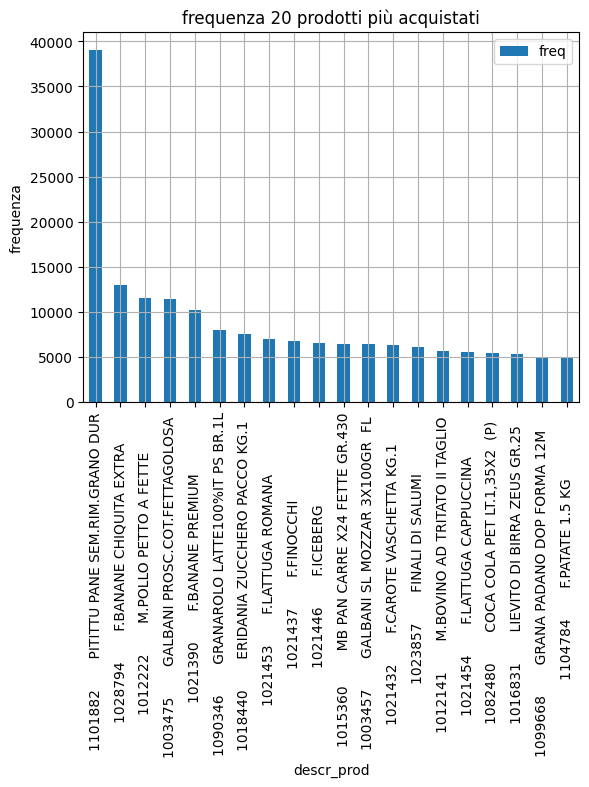

In [10]:
task1Set = pd.DataFrame(newdataset["descr_prod"].value_counts()[:20]).reset_index()

task1Set.columns = ["descr_prod","freq"]

dr.plotDraw(task1Set, x_ ="descr_prod",t="frequenza 20 prodotti più acquistati", xlabel_="descr_prod", ylabel_="frequenza")

## TASK2

Estraggo le 5 categorie di livello 3 più acquistate

<Figure size 2000x500 with 0 Axes>

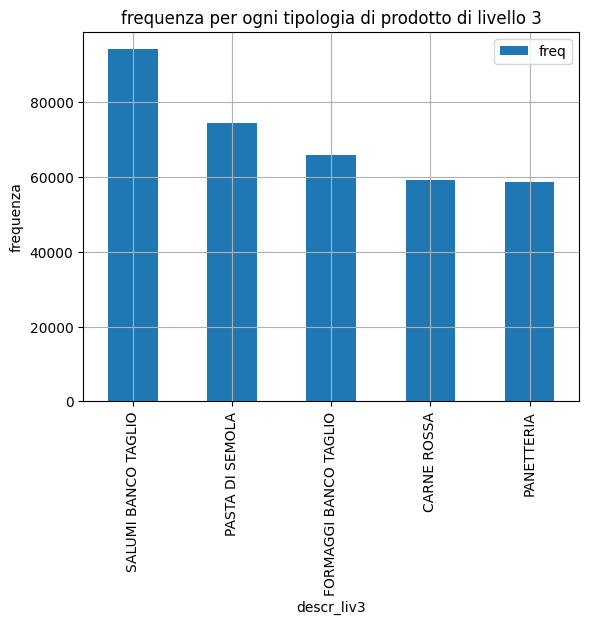

In [11]:
lev3Set = pd.DataFrame(newdataset["descr_liv3"].value_counts()[:5]).reset_index()

lev3Set.columns = ["descr_liv3","freq"]

dr.plotDraw(lev3Set, x_="descr_liv3", t = "frequenza per ogni tipologia di prodotto di livello 3", xlabel_="descr_liv3", ylabel_="frequenza")

Estraggo le 5 categorie di livello 4 più acquistate

<Figure size 2000x500 with 0 Axes>

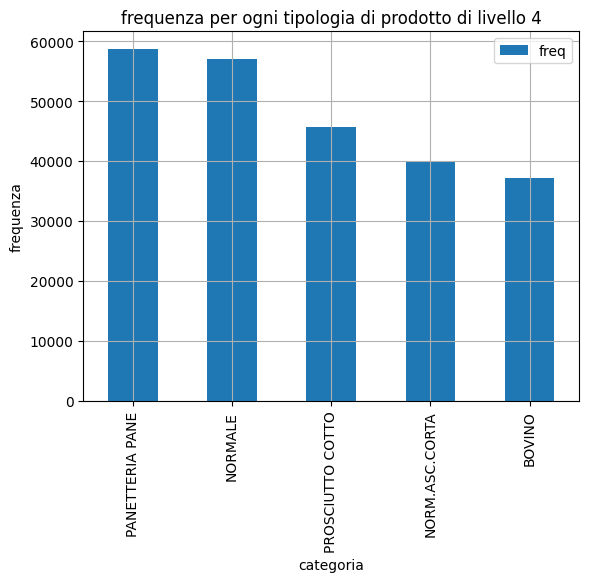

In [12]:
lev4Set = pd.DataFrame(newdataset["descr_liv4"].value_counts()[:5]).reset_index()

lev4Set.columns = ["descr_liv4","freq"]

dr.plotDraw(lev4Set, x_="descr_liv4", t = "frequenza per ogni tipologia di prodotto di livello 4", xlabel_="categoria", ylabel_="frequenza")

## TASK3

Preparo il dataset per l'applicazione della Market Basket Analisys

In [13]:
numeroScontrini = newdataset["scontrino_id"].nunique()

In [14]:
print("numero di scontrini diversi prima della pulizia: ", numeroScontrini)
print("numero di prodotti diversi, prima della pulizia: ", newdataset["descr_prod"].nunique())

numero di scontrini diversi prima della pulizia:  153931
numero di prodotti diversi, prima della pulizia:  22812


Creo due Set di dati differenti, in modo da poterli pre-processare nel migliore dei modi per applicare l'Apriori al primo e l'FPGrowht al secondo 

Questo perchè l'apriori a differenza dell'FPGrowht non risulta essere efficiente per dataset di grandi dimensioni. Di conseguenza il set di dati su cui verrà applicato l'apriori avrà una soglia di supporto più alta, in modo da effettuare una maggiore scrematura del set iniziale.


In [15]:
#Apriori
filteredDatasetAp = dc.filterBySupport(newdataset, "descr_prod","scontrino_id", numeroScontrini, supportoAp)

In [16]:
#FPGrowht
filteredDatasetFp = dc.filterBySupport(newdataset, "descr_prod","scontrino_id", numeroScontrini, supportoFp)

In [17]:
filteredDatasetAp = dc.filterByMinValue(filteredDatasetAp,"scontrino_id","descr_prod")

In [18]:
filteredDatasetFp = dc.filterByMinValue(filteredDatasetFp,"scontrino_id","descr_prod")

In [19]:
print("Apriori")
print("numero di prodotti diversi dopo la pulizia: ", filteredDatasetAp["descr_prod"].nunique())
print("numero di scontrini diversi dopo la pulizia: ", filteredDatasetAp["scontrino_id"].nunique())

Apriori
numero di prodotti diversi dopo la pulizia:  121
numero di scontrini diversi dopo la pulizia:  92484


In [20]:
print("FPGrowht")
print("numero di prodotti diversi dopo la pulizia: ", filteredDatasetFp["descr_prod"].nunique())
print("numero di scontrini diversi dopo la pulizia: ", filteredDatasetFp["scontrino_id"].nunique())

FPGrowht
numero di prodotti diversi dopo la pulizia:  121
numero di scontrini diversi dopo la pulizia:  92484


In [21]:
basketAp = pa.basketCreation(filteredDatasetAp, "scontrino_id", "descr_prod", "r_qta_pezzi")

Come si può vedere gli sontrini con il minor numero di prodotti sono quelli che ne contengono almeno 2

In [22]:
basketAp.gt(0).sum(axis=1).sort_values()

scontrino_id
68476471     2
60882732     2
60882735     2
60884367     2
54024234     2
            ..
54010778    19
67532408    19
56134083    19
58049376    19
60883474    23
Length: 92484, dtype: int64

In [23]:
basketFp = pa.basketCreation(filteredDatasetFp, "scontrino_id", "descr_prod", "r_qta_pezzi")

## APPLICAZIONE APRIORI E FPGROWHT

In [24]:
frequent_itemsetsAp = apriori(basketAp, min_support = 0.03,use_colnames=True).sort_values(by='support', ascending=False)

c:\Users\lavoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [25]:
frequent_itemsetsFp = apriori(basketFp, min_support = 0.02, use_colnames=True).sort_values(by='support', ascending=False)


c:\Users\lavoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [26]:
association_rules(frequent_itemsetsAp, metric="lift", min_threshold = 1).sort_values(by="lift",ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(1101882 PITITTU PANE SEM.RIM.GRANO DUR),(1021390 F.BANANE PREMIUM ),0.324078,0.090308,0.033898,0.104598,1.158238,1.0,0.004631,1.015959,0.202124,0.089090,0.015709,0.239978
1,(1021390 F.BANANE PREMIUM ),(1101882 PITITTU PANE SEM.RIM.GRANO DUR),0.090308,0.324078,0.033898,0.375359,1.158238,1.0,0.004631,1.082098,0.150182,0.089090,0.075869,0.239978
2,(1101882 PITITTU PANE SEM.RIM.GRANO DUR),(1012222 M.POLLO PETTO A FETTE ),0.324078,0.106245,0.035195,0.108601,1.022175,1.0,0.000764,1.002643,0.032095,0.089073,0.002636,0.219933
3,(1012222 M.POLLO PETTO A FETTE ),(1101882 PITITTU PANE SEM.RIM.GRANO DUR),0.106245,0.324078,0.035195,0.331264,1.022175,1.0,0.000764,1.010746,0.024272,0.089073,0.010632,0.219933


In [ ]:
rules = association_rules(frequent_itemsetsFp, metric="lift", min_threshold = 1).sort_values(by="lift",ascending=False).reset_index(drop=True)
rules = rules[(rules['confidence' ] >= 0.5)]
rules